In [636]:
import numpy as np
import pandas as pd
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns


In [732]:
housing = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)
housing = housing.drop_duplicates()
housing.shape

(2579, 81)

In [733]:
addr_2010 = pd.read_csv('data/addr_2010ACS.csv', index_col = 0)

/home/jack/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,75,90,91,92,117,118,121,122,166,170,171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [734]:
addr_2010['frac18to24'] = (addr_2010['B01001e7'] + addr_2010['B01001e8'] + addr_2010['B01001e9'] + addr_2010['B01001e10'] + addr_2010['B01001e31'] + addr_2010['B01001e32'] + addr_2010['B01001e33']  + addr_2010['B01001e34'])/ + addr_2010['B01001e1']
addr_2010['is_collegetown'] = np.where(addr_2010['frac18to24'] > 0.2, 1, 0)
addr_2010 = addr_2010[['PID', 'is_collegetown']]

In [735]:
addr_2010 = addr_2010.drop_duplicates(subset=['PID'])

In [526]:
missing_vals = housing.columns[housing.isnull().any()] 

In [527]:
for column in missing_vals: #inspecting missingness
    print(column)
    print(type(column))
    print(housing[column].value_counts())
    print(housing[column].isna().sum())
    print()

LotFrontage
<class 'str'>
60.0     246
80.0     127
70.0     124
50.0     111
75.0      92
        ... 
137.0      1
135.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 126, dtype: int64
462

Alley
<class 'str'>
Grvl    105
Pave     63
Name: Alley, dtype: int64
2411

MasVnrType
<class 'str'>
None       1558
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64
14

MasVnrArea
<class 'str'>
0.0      1553
120.0      13
216.0      11
108.0      10
176.0      10
         ... 
647.0       1
549.0       1
262.0       1
668.0       1
402.0       1
Name: MasVnrArea, Length: 416, dtype: int64
14

BsmtQual
<class 'str'>
TA    1166
Gd    1076
Ex     188
Fa      78
Po       2
Name: BsmtQual, dtype: int64
69

BsmtCond
<class 'str'>
TA    2315
Gd     101
Fa      88
Ex       3
Po       3
Name: BsmtCond, dtype: int64
69

BsmtExposure
<class 'str'>
No    1708
Av     344
Gd     242
Mn     214
Name: BsmtExposure, dtype: int64
71

BsmtFinType1
<class 'str

In [736]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(0) 
housing['MasVnrType'] = housing['MasVnrType'].fillna('None') 
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0) 
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('None')
housing['GarageFinish'] = housing['GarageFinish'].fillna('None')
housing['GarageType'] = housing['GarageType'].fillna('None')
housing['GarageQual'] = housing['GarageQual'].fillna('None')
housing['GarageCond'] = housing['GarageCond'].fillna('None')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('None')
housing['BsmtCond'] = housing['BsmtCond'].fillna('None')
housing['BsmtQual'] = housing['BsmtQual'].fillna('None')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('None')
housing['TotalBath'] = housing['FullBath'] + (housing['HalfBath']*.5)
housing['BsmtBath'] = housing['BsmtFullBath'] + (housing['BsmtHalfBath']*.5)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('Unf')
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0) 
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')
housing['BsmtFinSF'] = housing['BsmtFinSF1'] + housing['BsmtFinSF2']

housing = housing.drop(labels= ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
                                'FullBath','HalfBath', 'Condition2', 'BsmtFinSF2','Electrical', 'Utilities',
                                'RoofStyle', 'RoofMatl','MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
                               'BsmtFinType2', 'BsmtFinSF1', 'TotalBsmtSF', 'Heating', 'GarageYrBlt',
                               'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'], axis=1)
#MSSubClass, change to a string
#

In [737]:
housing = housing[['OverallQual', 'GrLivArea', 'Neighborhood', 'Condition1', 'BldgType', 'YearRemodAdd',
         'BsmtFinType1', 'BedroomAbvGr', 'GarageCars','YrSold', 'SalePrice', 'PID']]

In [686]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'TotalBath', 'BsmtBath', 'BsmtFinSF'],
      dtype='object')

In [740]:
X.head()

,OverallQual,GrLivArea,YearRemodAdd,BedroomAbvGr,GarageCars,YrSold,is_collegetown,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan
0,6,856,1950,2,2.0,2010,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5,1049,1984,2,1.0,2009,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,5,1001,2007,2,1.0,2007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1039,2003,2,1.0,2009,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8,1665,2001,3,2.0,2009,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [738]:
housing = pd.merge(housing, addr_2010, how = 'inner', on='PID')
housing.shape

(2558, 13)

In [442]:
solo_cups = housing1.loc[housing1['is_collegetown'] == 1]
y1 = solo_cups['SalePrice']
solo_cups = solo_cups.drop(labels = ['SalePrice', 'PID'], axis =1)
old_people = housing1.loc[housing1['is_collegetown'] == 0]
y2 = old_people['SalePrice']
old_people = old_people.drop(labels = ['SalePrice', 'PID'], axis =1)

In [739]:
y = housing['SalePrice']
housing = housing.drop(labels = ['SalePrice', 'PID'], axis =1)
X = pd.get_dummies(housing, drop_first=True, dummy_na=True)

In [444]:
X1 = pd.get_dummies(solo_cups, drop_first=True, dummy_na=True)
X2 = pd.get_dummies(old_people, drop_first=True, dummy_na=True)



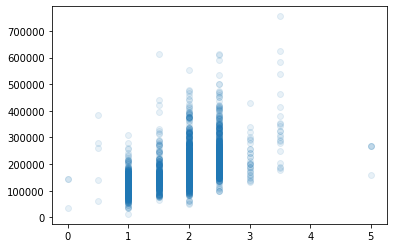

In [66]:
plt.scatter( housing['TotalBath'],housing['SalePrice'], alpha=.1)

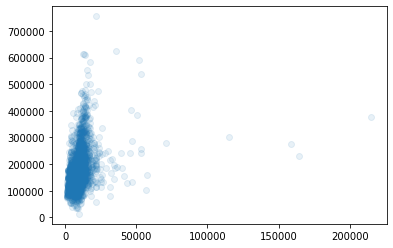

In [236]:
plt.scatter( housing['LotArea'],y, alpha=.1)

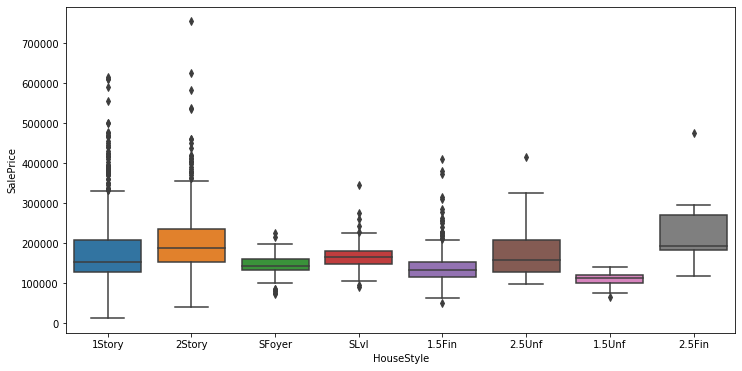

In [237]:
plt.figure(figsize=(12,6))
sns.boxplot(x='HouseStyle', y=y, data=housing)


### Data Analysis Ideas Beyond Basic EDA

**Central Question**: The simple linear model based on **GrLivArea** points to $price/ft^2$ as an important derived target. On the other hand, the fan-like price/square-foot scatterplot implies that different houses have a wide range of $price/ft^2$. We would like to study the major driving factors for these **Ames** homes to have significantly different $price/ft^2$.

No matter which local housing market we inspect, the house prices are the on-going consensus among the home-buyers and 
the home-sellers depending on the supply and demand of the current house market. The house market supply and demand
is influnced by the local labor market/economical condition, job creation, population density, interest rate, price momentum, etc. Among all the area related features (e.g. 1st floor area, 2nd floor area, basement finished area, etc.), do
the local home buyers show some preference towards some features over the others? In other words, are the home buyers
willing to spend an equal amount for one square-foot of 1st floor living space, 2nd floor living space,
deck space, finished basement space, etc.?

Frame your study using **multiple linear regression** and interpret your findings in terms of
the price discounts. Consider the following points:
- Which of the house styles, ranch or colonial, is more popular in terms of the house prices?
- What is the popularity in terms of the housing inventory (based on the available data)?
- Does the house price sensitivity on **2ndFlrSF** depend on the house style (1st story excluded)?
- How is **GrLivArea** engineered from the other area-related feature? If you would design a gross area feature (to replace **GrLivArea**) for the purpose of descriptive modeling, what would you do? What are the pros and cons when aggregating several features together?
- Do home buyers value upstairs bathrooms and basement bathrooms equally? Do they price 'half-bath' as one half of a full bath? Based on your finding, how would you design an aggregate bathroom feature? 
- How much premium were the **Ames** home buyers (back in $2006-2010$) willing to pay for a swimming-pool, an open deck, or an enclosed porch? Did the home buyers value the optional additions based on their sizes?
- How important is a garage in adding value to the houses? How about the differences between an attached vs. detached garage?
- Are there feature combinations which increase the house values? What are the feature combinations which drive the house values down (making the house less desriable)? 
- **House Quality/Condition**: The **Ames** dataset grades each house by the appearance, kitchen, basement, garage, 
    heating, fireplace, .... and finally an overall quality/condition. 
     - How are the overall quality/condition features engineered from the individual quality/condition metrics?
     - How do these metrics' importances affect local house prices?
     - To what extent does the **curb appeal** affect the house prices?
- Does home remodeling add value to the houses? For example, how do the old houses which were remodeled in the 1990s compare to the houses which were built in the 1990s?

In [551]:
housing.groupby('MSZoning').agg({'YearBuilt':['median', 'count']})

YearBuilt      
            median count
MSZoning                
C (all)     1920.0    15
FV          2004.0   113
I (all)     1900.0     1
RH          1955.5    18
RL          1976.0  2000
RM          1937.0   411

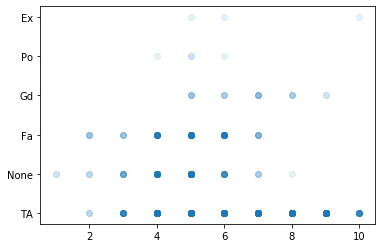

In [536]:
plt.scatter( housing['OverallQual'],housing['GarageQual'], alpha=.1)

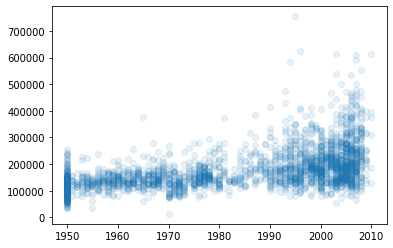

In [256]:
plt.scatter( housing['YearRemodAdd'],housing['SalePrice'], alpha=.1)

In [540]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Mis

In [542]:
housing['KitchenAbvGr'].value_counts()

1    2451
2     104
0       2
3       1
Name: KitchenAbvGr, dtype: int64

In [545]:
housing.loc[housing['KitchenAbvGr']>0]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBath,is_collegetown
0,909176150,856,126000,30,RL,0.0,7890,Pave,Reg,Lvl,...,0,166,0,0,3,2010,WD,Normal,1.0,1
1,905476230,1049,139500,120,RL,42.0,4235,Pave,Reg,Lvl,...,0,0,0,0,2,2009,WD,Normal,2.0,1
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,Reg,Lvl,...,86,0,0,0,11,2007,WD,Normal,1.0,1
3,535377150,1039,114000,70,RL,80.0,8146,Pave,Reg,Lvl,...,0,111,0,0,5,2009,WD,Normal,1.0,0
4,534177230,1665,227000,60,RL,70.0,8400,Pave,Reg,Lvl,...,0,0,0,0,11,2009,WD,Normal,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,903205040,952,121000,30,RL,0.0,8854,Pave,Reg,Lvl,...,0,40,0,0,5,2009,WD,Normal,1.0,0
2554,905402060,1733,139600,20,RL,0.0,13680,Pave,IR1,Lvl,...,0,0,0,0,6,2009,WD,Normal,2.0,1
2555,909275030,2002,145000,90,RH,82.0,6270,Pave,Reg,HLS,...,0,0,0,0,8,2007,WD,Normal,2.0,1
2556,907192040,1842,217500,60,RL,0.0,8826,Pave,Reg,Lvl,...,0,0,0,0,7,2007,WD,Normal,2.5,0


In [51]:
features = housing[['Neighborhood', 'OverallQual','GrLivArea' ]]
price = housing['SalePrice']
dummy = pd.get_dummies(features.Neighborhood)
dummy.drop('Blmngtn', axis=1, inplace=True) # race 1 is the dominant category
features = features.drop('Neighborhood', axis=1)
features = pd.concat([features, dummy], axis=1)
features.head()

,OverallQual,GrLivArea,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
1,6,856,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5,1049,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1039,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,8,1665,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([   2.,    0.,    7.,  199., 1654.,  649.,   45.,   15.,    5.,
           4.]),
 array([-249906.44800561, -197339.26981894, -144772.09163226,
         -92204.91344559,  -39637.73525892,   12929.44292776,
          65496.62111443,  118063.7993011 ,  170630.97748778,
         223198.15567445,  275765.33386113]),
 <a list of 10 Patch objects>)

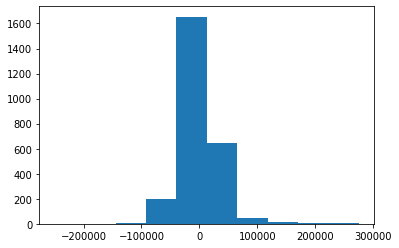

In [52]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(features, price)
residuals = price - lm.predict(features)
plt.hist(residuals)

In [53]:
print('R^2 is equal to %.3f' %(lm.score(features, price)))
print('RSS is equal to %.3f' %(np.sum((price-lm.predict(features))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.805
RSS is equal to 2826928147011.616
The intercept is -37119.745
The slopes are [ 2.10856640e+04  5.85380583e+01 -2.63422238e+04 -4.25588306e+04
 -1.78155865e+04  2.05541870e+04  9.04483537e+03  9.83797085e+03
 -1.28044080e+04 -5.80662007e+03 -5.77748520e+03  8.76546222e+04
 -2.94442488e+04 -2.96644762e+04 -2.15560765e+04  6.90929364e+03
 -5.56149110e+03 -2.76940029e+04 -5.68607539e+03  5.28475111e+04
  6.51454770e+04 -3.02063727e+04 -3.73470312e+04 -1.66606708e+03
 -5.43404229e+03  1.60842264e+04  6.05375887e+04  3.21686549e+04
  3.23329439e+04]


### Neighborhood Analysis

Many home buyers purchase their homes based on their neighborhood preferences and the location. Study the statistics on all the **Ames** neighborhoods, including prices, price/area, lot area, gross living area, built year, the ratios of one-story homes, the lot utility rate (how much of the lot is utilized to build the house), various quality/condition metrics, house styles, etc. Please depict a story of the urban development of **Ames** and relate it to the **Ames** house prices.

To get familiar with the various **Ames** neighborhoods and the ratings of the public schools, visit the map tab of [realtor.com](https://www.realtor.com/realestateandhomes-search/North-Ames_Ames_IA?view=map). While there are many housing info web sites, **realtor.com** uses a neighborhood system which is more compatible with the one used in the dataset. Getting the long-lat coordinates of the $2500$ houses also helps to pin-point the relative geographic locations of the neighborhoods.

Consider the following questions:
- Does the price sensitivity on quality depend on the neighborhood?  
- Given that **Ames** has about $30\%$ poverty rate, and that **ISU** is the largest employer of the city, identify the affluent and poor neighborhoods based on your data analysis and the external information. Identify the neighborhoods which offer a convenient job commute.
- What types of dwelling are popular in **Ames**? How about their popularities in the different neighborhoods?
- **Time Series Analysis**:  
    - During $2006-2010$, does **Ames** housing market show any pricing trend? Is your observation consistent with the fact that the great recession occured in $2008-2009$.
    - How would you describe the price tend of different types of dwellings in terms of time series (hint: pivot/pivot_table)?
    - In the U.S., there are more house-shopping activities during the warmer seasons (spring/summer). What is the seasonality of **Ames** house transactions?

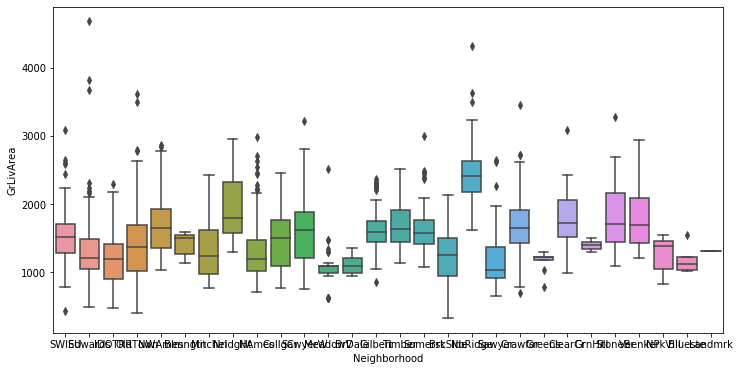

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='GrLivArea', data=housing)

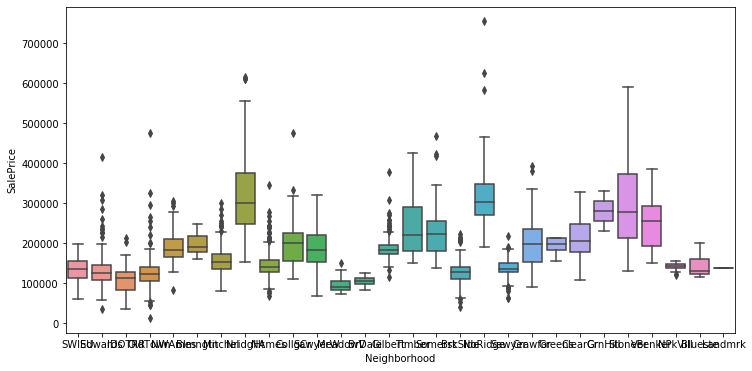

In [318]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing)

In [ ]:
housing.groupby('Neighborhood').agg()

In [728]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [729]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.8595581027493095

In [578]:
lm.score(X_test, y_test)

0.9107975680584686

In [327]:
y_test

810    166000
540    180000
762    119000
319    128500
962    210000
        ...  
57     176000
28     200100
11     156500
26     168165
284    104500
Name: SalePrice, Length: 516, dtype: int64

In [170]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [581]:
ridge.set_params(alpha=10.0)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.9300279269419273

In [582]:
ridge.score(X_test, y_test)

0.922957502996617

In [590]:
lasso.set_params(alpha=100, normalize=True)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [591]:
lasso.fit(X_train, y_train)
print('The intercept is %.4f' %(lasso.intercept_))
lassoCoef = pd.Series(lasso.coef_, index=X_train.columns)
print('The slopes are \n%s' %(lassoCoef))
lasso.score(X_train, y_train)

The intercept is -500254.0317
The slopes are 
GrLivArea                   42.340958
MSSubClass                 -28.772471
LotFrontage                  0.000000
LotArea                      0.466897
OverallQual              16249.301273
                             ...     
SaleCondition_Alloca        -0.000000
SaleCondition_Family        -0.000000
SaleCondition_Normal        -0.000000
SaleCondition_Partial     2756.374086
SaleCondition_nan            0.000000
Length: 373, dtype: float64


0.855538111384718

In [592]:
lassoCoef.value_counts()

 0.000000        350
 0.466897          1
 12853.524961      1
 16249.301273      1
 2.854274          1
-4509.949872       1
 29.874099         1
 19.912891         1
 13.895847         1
 2756.374086       1
 59.407990         1
-843.315236        1
-3057.405926       1
 177.188593        1
 11516.288016      1
 14345.019521      1
-647.528301        1
 17.949026         1
 2116.178333       1
-28.772471         1
 2828.094119       1
 5.409089          1
 7642.051218       1
 42.340958         1
dtype: int64

In [593]:
lasso.score(X_test, y_test)

0.8635831360393793

In [583]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,10)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True)  
    lasso.fit(X_train, y_train)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(X_train, y_train))  

/home/jack/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337571637864.07355, tolerance: 1130312420.795671
  positive)


In [586]:

R2test  = []
alphaRange = np.linspace(1e-3,200,10)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True)  
    lasso.fit(X_train, y_train)
    #intercepts.append(lasso.intercept_)
    #coefs.append(lasso.coef_)
    R2test.append(lasso.score(X_test, y_test))  

/home/jack/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337571637864.07355, tolerance: 1130312420.795671
  positive)


In [587]:
list(zip(R2, R2test))

[(0.9360174630928572, 0.9128940530500154),
 (0.9115671405191162, 0.9081352603450408),
 (0.8909454871454522, 0.8944480140695988),
 (0.8745792348249707, 0.8822410959741749),
 (0.8612212435008959, 0.8696936025199343),
 (0.8495317462468356, 0.8570850548001531),
 (0.8389250084358457, 0.8456817067269473),
 (0.8290035999791354, 0.8335384910169967),
 (0.8184763358020285, 0.8189392600941026),
 (0.8080655411296869, 0.804333807783484)]

Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

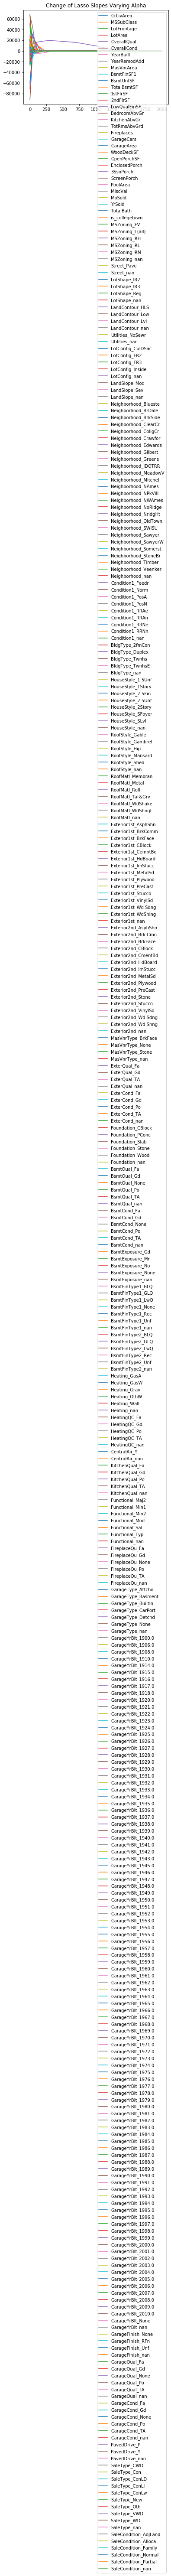

In [567]:
coefs = pd.DataFrame(np.array(coefs), columns=X.columns)

for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=1)    
plt.title('Change of Lasso Slopes Varying Alpha')

In [ ]:
alphaSize  = 40
rhoSize    = 30
alphaRange = np.linspace(1e-2, 10, alphaSize)
rhoRange   = np.linspace(0.01, 1, rhoSize)
trainR2    = np.zeros((alphaSize, rhoSize))
testR2     = np.zeros((alphaSize, rhoSize))
intercepts = np.zeros((alphaSize, rhoSize))
coefs      = np.zeros((alphaSize, rhoSize, 8))

net.set_params(normalize=True)

for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
        net.set_params(alpha=alpha, l1_ratio=rho)
        net.fit(X_train, y_train)
        trainR2[alphaIdx, rhoIdx] = net.score(trainX, trainY)
        testR2[alphaIdx, rhoIdx]  = net.score(testX, testY)
        intercepts[alphaIdx, rhoIdx] = net.intercept_
        coefs[alphaIdx, rhoIdx, :] = net.coef_

In [447]:
# (1)
from sklearn import ensemble
import sklearn.model_selection as ms
randomForest = ensemble.RandomForestRegressor()

randomForest.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [394]:

# fit RF model on training set
randomForest.set_params(random_state=0)

randomForest.fit(X_train, y_train) 
print(randomForest.score(X_train, y_train))
print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

The training error is: 0.01667
The test     error is: 0.10597


In [191]:
# set the parameter grid
grid_para_forest = {
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [199]:
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 13.7 s, sys: 1.1 s, total: 14.8 s
Wall time: 11min 59s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [209]:
# get the best parameters
grid_search_forest.best_params_

{'max_depth': 25, 'n_estimators': 50}

In [210]:
# get the best score
grid_search_forest.best_score_

0.8827667669323371

In [205]:
print('The best score is %.4f' %grid_search_forest.best_score_)
print('The training error is %.4f' %(1 - grid_search_forest.best_estimator_.score(X_train, y_train)))
print('The testing error is %.4f' %(1 - grid_search_forest.best_estimator_.score(X_test, y_test)))

The best score is 0.8828
The training error is 0.0167
The testing error is 0.1071


In [741]:
randomForest.set_params(max_depth = 25, n_estimators = 50)
randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [742]:
from sklearn.model_selection import cross_val_score

print(np.sqrt(-1* cross_val_score(randomForest, X_train, y_train, cv=10, scoring='neg_mean_squared_error')))


[35058.63717163 39430.57812619 25986.36390507 31730.25462002
 37268.8222675  27391.26094374 22559.94996214 26095.39033583
 27470.56393428 25465.0226435 ]


In [743]:

randomForest.fit(X_train, y_train)

print(randomForest.score(X_train, y_train))
print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

0.9753067049018034
The training error is: 0.02469
The test     error is: 0.13322


In [308]:
y_test

810    166000
540    180000
762    119000
319    128500
962    210000
        ...  
57     176000
28     200100
11     156500
26     168165
284    104500
Name: SalePrice, Length: 516, dtype: int64

In [297]:
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

The test     error is: 0.11607


In [478]:
# feature importance sort
# (3)
feature_importance = list(zip(X.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'OverallQua', b'GrLivArea', b'1stFlrSF', b'GarageArea', b'TotalBsmtS']

Text(0.5, 1.0, 'feature importance')

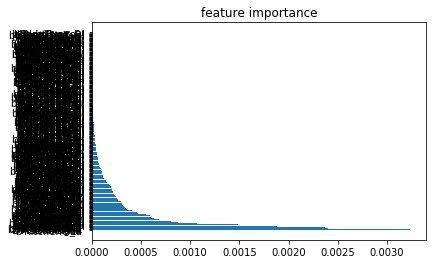

In [481]:
featureNames, featureScores = zip(*list(feature_sort[:]))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')

In [261]:

lm = LinearRegression()
lm.fit(X_train[['OverallQual', 'GrLivArea','GarageArea', 'LotArea', 'YearBuilt']], y_train)
lm.score(X_train[['OverallQual', 'GrLivArea', 'GarageArea', 'LotArea', 'YearBuilt']], y_train)

0.796079701200384

Unsupervised learning PCA

In [229]:
from sklearn.decomposition import PCA
pca = PCA()

In [230]:
pca.get_params

<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>

In [231]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [232]:
pca.components_

array([[ 1.51860843e-02, -9.89757735e-04,  4.75001211e-04, ...,
        -1.08518524e-06,  6.21502513e-07, -0.00000000e+00],
       [ 5.92550240e-01, -4.09321384e-03,  8.63724350e-03, ...,
        -3.97982453e-05,  4.76976319e-05,  0.00000000e+00],
       [-3.80756957e-01, -2.01775004e-02,  8.72086234e-04, ...,
        -9.00375963e-06,  9.58605027e-06,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-5.00000000e-01,  9.71445147e-17,  0.00000000e+00, ...,
        -4.25305068e-15, -4.13079842e-15,  0.00000000e+00],
       [ 0.00000000e+00,  1.23349681e-15,  1.62426565e-16, ...,
         5.69311959e-13, -1.22653623e-13,  0.00000000e+00]])

In [233]:
pca.explained_variance_ratio_

array([9.79492042e-01, 6.42659347e-03, 4.68389405e-03, 3.69405539e-03,
       3.53517918e-03, 7.98166255e-04, 4.22797234e-04, 3.27055116e-04,
       2.17056344e-04, 1.38651666e-04, 6.28610236e-05, 5.58478287e-05,
       4.50379394e-05, 2.65076852e-05, 2.29198593e-05, 1.60245431e-05,
       1.27925665e-05, 1.05522124e-05, 8.50893817e-06, 3.14594521e-06,
       9.79846077e-08, 2.36759429e-08, 1.63312093e-08, 1.42561462e-08,
       1.04352032e-08, 7.91448152e-09, 6.05563069e-09, 5.77567891e-09,
       4.63881475e-09, 4.35987006e-09, 4.17271467e-09, 3.91727916e-09,
       3.82744692e-09, 3.58090703e-09, 3.40178630e-09, 3.25557489e-09,
       3.15190123e-09, 3.10496275e-09, 2.85417046e-09, 2.63098096e-09,
       2.56061414e-09, 2.50860086e-09, 2.40722987e-09, 2.30238398e-09,
       2.22944650e-09, 2.05637498e-09, 1.96352147e-09, 1.92612610e-09,
       1.87902557e-09, 1.76403548e-09, 1.68400664e-09, 1.59108177e-09,
       1.52911326e-09, 1.51789055e-09, 1.48240264e-09, 1.44844599e-09,
      

Random Forests on Areas with college kids against areas without college kids

In [445]:
#solo cups
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
#old people
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [450]:
#randomForest.set_params(max_depth = 1, n_estimators = 100)
randomForest.fit(X1_train, y1_train)

print(randomForest.score(X1_train, y1_train))
print("The training error is: %.5f" % (1 - randomForest.score(X1_train, y1_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X1_test, y1_test)))

0.9707473600666369
The training error is: 0.02925
The test     error is: 0.16947


In [451]:
# feature importance sort
# (3)
feature_importance = list(zip(X1.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'OverallQua', b'GrLivArea', b'1stFlrSF', b'LotArea', b'TotalBsmtS']

Text(0.5, 1.0, 'feature importance')

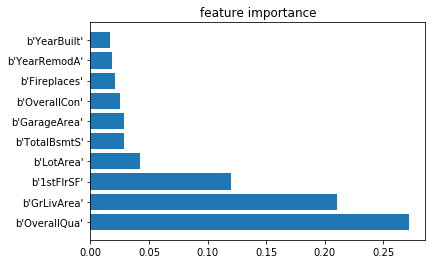

In [452]:
featureNames, featureScores = zip(*list(feature_sort[0:10]))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')

In [618]:
#randomForest.set_params(max_depth = 25, n_estimators = 100)
randomForest.fit(X2_train, y2_train)

print(randomForest.score(X2_train, y2_train))
print("The training error is: %.5f" % (1 - randomForest.score(X2_train, y2_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X2_test, y2_test)))

0.9860895318204183
The training error is: 0.01391
The test     error is: 0.08931


In [454]:
# feature importance sort
# (3)
feature_importance = list(zip(X2.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'OverallQua', b'GrLivArea', b'1stFlrSF', b'TotalBath', b'BsmtFinSF1']

Text(0.5, 1.0, 'feature importance')

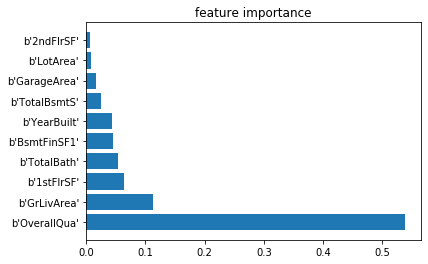

In [455]:
featureNames, featureScores = zip(*list(feature_sort[0:10]))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')

In [423]:
addr_2010.shape

(2697, 2)

In [407]:
addr_2010.head()

,PID,GrLivArea,SalePrice_x,pp_sqft,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,...,C25095e26,C25095m26,C25095e27,C25095m27,C25095e28,C25095m28,C25095e29,C25095m29,Shape_Leng,Shape_Area
field_1,,,,,,,,,,,,,,,,,,,,,
29,916386140,1466,201000,137.107776,20,RL,73.0,8925,Pave,NaN,...,180,60,180,60,0,99,0,99,0.299335,0.004125
38,916386010,1346,220000,163.447251,20,RL,88.0,11896,Pave,NaN,...,180,60,180,60,0,99,0,99,0.299335,0.004125
130,916455050,1312,180500,137.576220,20,RL,NaN,6718,Pave,NaN,...,180,60,180,60,0,99,0,99,0.299335,0.004125
143,916455120,1440,232500,161.458333,20,RL,82.0,11202,Pave,NaN,...,180,60,180,60,0,99,0,99,0.299335,0.004125
145,916326090,2279,257000,112.768758,20,RL,149.0,19958,Pave,NaN,...,180,60,180,60,0,99,0,99,0.299335,0.004125


In [457]:
X1_train.shape

(508, 335)

In [519]:
y1.describe()

count       636.000000
mean     157398.545597
std       55162.376428
min       35000.000000
25%      123000.000000
50%      145700.000000
75%      188000.000000
max      415000.000000
Name: SalePrice, dtype: float64

In [520]:
y2.describe()

count      1922.000000
mean     185141.759625
std       79160.812943
min       12789.000000
25%      133000.000000
50%      166000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64